# ELE510 Image Processing with robot vision: LAB, Exercise  4, Spatial-domain filtering

**Purpose:** *To learn about Linear Filters and Local Image Features and its use in computer vision (image processing). Some basic experiments will be implemented using Pyhon, OpenCV and other packages.*

The theory for this exercise can be found in chapter 5 of the text book [1]. See also the following documentations for help:
- [OpenCV](https://opencv.org/opencv-python-free-course/)
- [numpy](https://numpy.org/doc/stable/)
- [matplotlib](https://matplotlib.org/stable/contents.html)
- [scipy](https://docs.scipy.org/doc/)


**IMPORTANT:** Read the text carefully before starting the work. In
many cases it is necessary to do some preparations before you start the work
on the computer. Read necessary theory and answer the theoretical part
frst. The theoretical and experimental part should be solved individually.
The notebook must be approved by the lecturer or his assistant.

**Approval:**
<div class="alert alert-block alert-success">
The current notebook should be submitted on CANVAS as a single pdf file. 
</div>

<div class="alert alert-block alert-info">
    To export the notebook in a pdf format, goes to File -> Download as -> PDF via LaTeX (.pdf).
</div>

**Note regarding the notebook**: The theoretical questions can be answered directly on the notebook using a *Markdown* cell and LaTex commands (if relevant). In alternative, you can attach a scan (or an image) of the answer directly in the cell.

Possible ways to insert an image in the markdown cell:

`![image name]("image_path")`

`<img src="image_path" alt="Alt text" title="Title text" />`


**Under you will find parts of the solution that is already programmed.**

<div class="alert alert-block alert-info">
    <p>You have to fill out code everywhere it is indicated with `...`</p>
    <p>The code section under `######## a)` is answering subproblem a) etc.</p>
</div>

## Problem 1

In this problem we want to get a better understanding of linear filtering using convolution. 

**The computations should be done by hand on paper until you are confident that you know how to do it.** 

Thereafter you can use the notebook to complete and check the results.

**Sobel** and **Prewitt** masks are used to compute the two components of the gradient. 
They perform differentiation over a 3 pixel region in the horizontal (x) and vertical (y) direction respectively and smooth by a 3 pixel smoothing filter in the other direction. 
The masks represent separable 2D filters and can thereby be separated in a differentiation filter and a smoothing filter.

The **Sobel masks**:
\begin{equation}\label{L3-eq6}
    {\mathbf h}_{x}= \begin{bmatrix} 1\; & 0\; & -1\\ 2\; & 0\; & -2 \\
      1\; & 0\; & -1\end{bmatrix}   \qquad {\mathbf h}_{y}= \begin{bmatrix} 1 & 2 & 1\\ 0 & 0 & 0 \\
      -1 & -2 & -1\end{bmatrix}.
\end{equation}

The **Prewitt masks**:
\begin{equation}\label{L3-eq7}
    {\mathbf h}_{x}= \begin{bmatrix} 1\; & 0\; & -1\\ 1\; & 0\; & -1 \\
      1\; & 0\; & -1\end{bmatrix}   \qquad {\mathbf h}_{y}= \begin{bmatrix} 1 & 1 & 1\\ 0 & 0 & 0 \\
      -1 & -1 & -1\end{bmatrix}.
\end{equation}

**a)** Find the 1D **differentiation filter** and the 1D **smoothing filter** for the Sobel and Prewitt masks. The result will be similar for the x- and y-direction. It is therefore sufficient to find the result for one of the directions, e.g. the x-direction.

Consider the following image:

\begin{equation}\label{Lab2eq6}
    {\mathbf Im} = \begin{bmatrix} 0 & 0 & 0 & 0 & 0 & 0\\0 & 1 & 0 & 0 & 1 & 0\\
        0 & 0 & 1 & 1 & 0 & 0\\0 & 0 & 1 & 1 & 0 & 0\\
        0 & 1 & 0 & 0 & 1 & 0\\0 & 0 &  0 & 0 & 0 & 0\end{bmatrix}.
\end{equation}





* A 1D smoothing filter can be represented in the form of a gaussian filter or a box filter where pixels or points in the center are prioritized for having more importance, therefore more weight. i.e
$$[0, 1, 2, 1, 0 ]$$
* A 1D differentiation filter can be represented in the form of $$[1, -1]$$ vector

### Sobel filters
* It is possible to immediately see the differrentiation filter as [1, 0, -1] and Gaussian filter as [1, 2, 1]
\begin{equation}
    {\mathbf h}_{x}= \begin{bmatrix} 1 \\ 2 \\ 1\end{bmatrix} *  \begin{bmatrix} 1 & 0 & -1\end{bmatrix} \qquad 
    {\mathbf h}_{y}= \begin{bmatrix} 1 & 2 & 1\end{bmatrix} *  \begin{bmatrix} 1 \\ 0 \\ -1\end{bmatrix}
\end{equation}


### Prewitt filters
* It is possible to immediately see the differrentiation filter as [1, 0, -1] and average filter as [1, 1, 1]
\begin{equation}
    {\mathbf h}_{x}= \begin{bmatrix} 1 \\ 1 \\ 1\end{bmatrix} *  \begin{bmatrix} 1 & 0 & -1\end{bmatrix} \qquad 
    {\mathbf h}_{y}= \begin{bmatrix} 1 & 1 & 1\end{bmatrix} *  \begin{bmatrix} 1 \\ 0 \\ -1\end{bmatrix}
\end{equation}


**b)** Filter this image using the **Prewitt** masks. Find the two output images, representing the differential along the horizontal and vertical directions.

<details style="margin-top:20px">
    <summary>
        <font size="2" color="green"><b>Click here for an optional hint</b></font>
    </summary>
    1. Since the mask is not symmetric, it should be flipped before apply the convolution operation with the image.
</details>

### Prewitt Filter Mask X
\begin{equation}
    {\mathbf h}_{x_{flipped}}= 
    \begin{bmatrix} -1 & 0 & 1\\ -1 & 0 & 1 \\ -1 & 0 & 1\end{bmatrix}
\end{equation}

\begin{equation}
    {\mathbf h}_{x_{flipped}} \circledast  {\mathbf Im} = 
    \begin{bmatrix} 
        -1 &  0 & 1 \\ 
        -1 &  0 & 1 \\ 
        -1 &  0 & 1 \\
    \end{bmatrix} 
    \circledast
    \begin{bmatrix} 
        0 & 0 & 0 & 0 & 0 & 0 \\
        0 & 1 & 0 & 0 & 1 & 0 \\
        0 & 0 & 1 & 1 & 0 & 0 \\
        0 & 0 & 1 & 1 & 0 & 0 \\
        0 & 1 & 0 & 0 & 1 & 0 \\
        0 & 0 & 0 & 0 & 0 & 0 \\
    \end{bmatrix}
\end{equation}

\begin{equation}
{\mathbf h}_{x_{flipped}} \circledast  {\mathbf Im} = 
\begin{bmatrix} 
    \sum{
        h_{x_{flipped}} *
        \begin{bmatrix} 
        0 & 0 & 0 \\
        0 & 1 & 0 \\
        0 & 0 & 1 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{x_{flipped}} *
        \begin{bmatrix} 
        0 & 0 & 0 \\
        1 & 0 & 0 \\
        0 & 1 & 1 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{x_{flipped}} *
        \begin{bmatrix} 
        0 & 0 & 0 \\
        0 & 0 & 1 \\
        1 & 1 & 0 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{x_{flipped}} *
        \begin{bmatrix} 
        0 & 0 & 0 \\
        0 & 1 & 0 \\
        1 & 0 & 0 \\
        \end{bmatrix} 
    } \\
    \sum{
        h_{x_{flipped}} *
        \begin{bmatrix} 
        0 & 1 & 0 \\
        0 & 0 & 1 \\
        0 & 0 & 1 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{x_{flipped}} *
        \begin{bmatrix} 
        1 & 0 & 0 \\
        0 & 1 & 1 \\
        0 & 1 & 1 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{x_{flipped}} *
        \begin{bmatrix} 
        0 & 0 & 1 \\
        1 & 1 & 0 \\
        1 & 1 & 0 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{x_{flipped}} *
        \begin{bmatrix} 
        0 & 1 & 0 \\
        1 & 0 & 0 \\
        1 & 0 & 0 \\
        \end{bmatrix} 
    } \\
    \sum{
        h_{x_{flipped}} *
        \begin{bmatrix} 
        0 & 0 & 1 \\
        0 & 0 & 1 \\
        0 & 1 & 0 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{x_{flipped}} *
        \begin{bmatrix} 
        0 & 1 & 1 \\
        0 & 1 & 1 \\
        1 & 0 & 0 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{x_{flipped}} *
        \begin{bmatrix} 
        1 & 1 & 0 \\
        1 & 1 & 0 \\
        0 & 0 & 1 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{x_{flipped}} *
        \begin{bmatrix} 
        1 & 0 & 0 \\
        1 & 0 & 0 \\
        0 & 1 & 0 \\
        \end{bmatrix} 
    } \\
    \sum{
        h_{x_{flipped}} *
        \begin{bmatrix} 
        0 & 0 & 1 \\
        0 & 1 & 0 \\
        0 & 0 & 0 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{x_{flipped}} *
        \begin{bmatrix} 
        0 & 1 & 1 \\
        1 & 0 & 0 \\
        0 & 0 & 0 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{x_{flipped}} *
        \begin{bmatrix}
        1 & 1 & 0 \\
        0 & 0 & 1 \\
        0 & 0 & 0 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{x_{flipped}} *
        \begin{bmatrix} 
        1 & 0 & 0 \\
        0 & 1 & 0 \\
        0 & 0 & 0 \\
        \end{bmatrix} 
    } \\
\end{bmatrix}
\end{equation}
\begin{equation}
I_x=
\begin{bmatrix}
1  & 0  & 0  & -1 \\
2  & 1  & -1 & -2 \\
2  & 1  & -1 & -2 \\
1  & 0  & 0  & -1 \\
\end{bmatrix}
\end{equation}

### Prewitt Filter Mask Y
\begin{equation}
    {\mathbf h}_{y_{flipped}}= 
    \begin{bmatrix} -1 & -1 & -1\\ 0 & 0 & 0 \\ 1 & 1 & 1\end{bmatrix}
\end{equation}

\begin{equation}
    {\mathbf h}_{y_{flipped}} \circledast  {\mathbf Im} = 
    \begin{bmatrix} 
        -1 & -1 & -1 \\ 
         0 &  0 &  0 \\ 
         1 &  1 &  1 \\
    \end{bmatrix} 
    \circledast
    \begin{bmatrix} 
        0 & 0 & 0 & 0 & 0 & 0 \\
        0 & 1 & 0 & 0 & 1 & 0 \\
        0 & 0 & 1 & 1 & 0 & 0 \\
        0 & 0 & 1 & 1 & 0 & 0 \\
        0 & 1 & 0 & 0 & 1 & 0 \\
        0 & 0 & 0 & 0 & 0 & 0 \\
    \end{bmatrix}
\end{equation}

\begin{equation}
{\mathbf h}_{y_{flipped}} \circledast  {\mathbf Im} = 
\begin{bmatrix} 
    \sum{
        h_{y_{flipped}} *
        \begin{bmatrix} 
        0 & 0 & 0 \\
        0 & 1 & 0 \\
        0 & 0 & 1 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{y_{flipped}} *
        \begin{bmatrix} 
        0 & 0 & 0 \\
        1 & 0 & 0 \\
        0 & 1 & 1 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{y_{flipped}} *
        \begin{bmatrix} 
        0 & 0 & 0 \\
        0 & 0 & 1 \\
        1 & 1 & 0 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{y_{flipped}} *
        \begin{bmatrix} 
        0 & 0 & 0 \\
        0 & 1 & 0 \\
        1 & 0 & 0 \\
        \end{bmatrix} 
    } \\
    \sum{
        h_{y_{flipped}} *
        \begin{bmatrix} 
        0 & 1 & 0 \\
        0 & 0 & 1 \\
        0 & 0 & 1 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{y_{flipped}} *
        \begin{bmatrix} 
        1 & 0 & 0 \\
        0 & 1 & 1 \\
        0 & 1 & 1 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{y_{flipped}} *
        \begin{bmatrix} 
        0 & 0 & 1 \\
        1 & 1 & 0 \\
        1 & 1 & 0 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{y_{flipped}} *
        \begin{bmatrix} 
        0 & 1 & 0 \\
        1 & 0 & 0 \\
        1 & 0 & 0 \\
        \end{bmatrix} 
    } \\
    \sum{
        h_{y_{flipped}} *
        \begin{bmatrix} 
        0 & 0 & 1 \\
        0 & 0 & 1 \\
        0 & 1 & 0 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{y_{flipped}} *
        \begin{bmatrix} 
        0 & 1 & 1 \\
        0 & 1 & 1 \\
        1 & 0 & 0 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{y_{flipped}} *
        \begin{bmatrix} 
        1 & 1 & 0 \\
        1 & 1 & 0 \\
        0 & 0 & 1 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{y_{flipped}} *
        \begin{bmatrix} 
        1 & 0 & 0 \\
        1 & 0 & 0 \\
        0 & 1 & 0 \\
        \end{bmatrix} 
    } \\
    \sum{
        h_{y_{flipped}} *
        \begin{bmatrix} 
        0 & 0 & 1 \\
        0 & 1 & 0 \\
        0 & 0 & 0 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{y_{flipped}} *
        \begin{bmatrix} 
        0 & 1 & 1 \\
        1 & 0 & 0 \\
        0 & 0 & 0 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{y_{flipped}} *
        \begin{bmatrix}
        1 & 1 & 0 \\
        0 & 0 & 1 \\
        0 & 0 & 0 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{y_{flipped}} *
        \begin{bmatrix} 
        1 & 0 & 0 \\
        0 & 1 & 0 \\
        0 & 0 & 0 \\
        \end{bmatrix} 
    } \\
\end{bmatrix}
\end{equation}
\begin{equation}
I_y=
\begin{bmatrix}
 1  &  2 &  2 &  1 \\
 0  &  1 &  1 &  0 \\
 0  & -1 & -1 &  0 \\
 -1 & -2 & -2 & -1 \\
\end{bmatrix}
\end{equation}

**c)** Filter this image using the **Sobel** masks. Find the two output images, representing the differential along the horizontal and vertical directions.

<details style="margin-top:20px">
    <summary>
        <font size="2" color="green"><b>Click here for an optional hint</b></font>
    </summary>
    1. Since the mask is not symmetric, it should be flipped before apply the convolution operation with the image.
</details>

### Sobel Filter Mask X
\begin{equation}
    {\mathbf h}_{x_{flipped}}= 
    \begin{bmatrix} -1 & 0 & 1\\ -2 & 0 & 2 \\ -1 & 0 & 1\end{bmatrix}
\end{equation}

\begin{equation}
    {\mathbf h}_{x_{flipped}} \circledast  {\mathbf Im} = 
    \begin{bmatrix} 
        -1 &  0 &  1 \\ 
        -2 &  0 &  2 \\ 
        -1 &  0 &  1 \\
    \end{bmatrix} 
    \circledast
    \begin{bmatrix} 
        0 & 0 & 0 & 0 & 0 & 0 \\
        0 & 1 & 0 & 0 & 1 & 0 \\
        0 & 0 & 1 & 1 & 0 & 0 \\
        0 & 0 & 1 & 1 & 0 & 0 \\
        0 & 1 & 0 & 0 & 1 & 0 \\
        0 & 0 & 0 & 0 & 0 & 0 \\
    \end{bmatrix}
\end{equation}

\begin{equation}
{\mathbf h}_{x_{flipped}} \circledast  {\mathbf Im} = 
\begin{bmatrix} 
    \sum{
        h_{x_{flipped}} *
        \begin{bmatrix} 
        0 & 0 & 0 \\
        0 & 1 & 0 \\
        0 & 0 & 1 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{x_{flipped}} *
        \begin{bmatrix} 
        0 & 0 & 0 \\
        1 & 0 & 0 \\
        0 & 1 & 1 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{x_{flipped}} *
        \begin{bmatrix} 
        0 & 0 & 0 \\
        0 & 0 & 1 \\
        1 & 1 & 0 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{x_{flipped}} *
        \begin{bmatrix} 
        0 & 0 & 0 \\
        0 & 1 & 0 \\
        1 & 0 & 0 \\
        \end{bmatrix} 
    } \\
    \sum{
        h_{x_{flipped}} *
        \begin{bmatrix} 
        0 & 1 & 0 \\
        0 & 0 & 1 \\
        0 & 0 & 1 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{x_{flipped}} *
        \begin{bmatrix} 
        1 & 0 & 0 \\
        0 & 1 & 1 \\
        0 & 1 & 1 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{x_{flipped}} *
        \begin{bmatrix} 
        0 & 0 & 1 \\
        1 & 1 & 0 \\
        1 & 1 & 0 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{x_{flipped}} *
        \begin{bmatrix} 
        0 & 1 & 0 \\
        1 & 0 & 0 \\
        1 & 0 & 0 \\
        \end{bmatrix} 
    } \\
    \sum{
        h_{x_{flipped}} *
        \begin{bmatrix} 
        0 & 0 & 1 \\
        0 & 0 & 1 \\
        0 & 1 & 0 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{x_{flipped}} *
        \begin{bmatrix} 
        0 & 1 & 1 \\
        0 & 1 & 1 \\
        1 & 0 & 0 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{x_{flipped}} *
        \begin{bmatrix} 
        1 & 1 & 0 \\
        1 & 1 & 0 \\
        0 & 0 & 1 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{x_{flipped}} *
        \begin{bmatrix} 
        1 & 0 & 0 \\
        1 & 0 & 0 \\
        0 & 1 & 0 \\
        \end{bmatrix} 
    } \\
    \sum{
        h_{x_{flipped}} *
        \begin{bmatrix} 
        0 & 0 & 1 \\
        0 & 1 & 0 \\
        0 & 0 & 0 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{x_{flipped}} *
        \begin{bmatrix} 
        0 & 1 & 1 \\
        1 & 0 & 0 \\
        0 & 0 & 0 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{x_{flipped}} *
        \begin{bmatrix}
        1 & 1 & 0 \\
        0 & 0 & 1 \\
        0 & 0 & 0 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{x_{flipped}} *
        \begin{bmatrix} 
        1 & 0 & 0 \\
        0 & 1 & 0 \\
        0 & 0 & 0 \\
        \end{bmatrix} 
    } \\
\end{bmatrix} =
\end{equation}
\begin{equation}
I_x=
\begin{bmatrix}
 1 & -1 &  1 & -1 \\
 3 &  2 & -4 & -3 \\
 1 &  0 & -2 & -3 \\
-1 & -3	&  1 & -1 \\ 
 \end{bmatrix}
\end{equation}

### Sobel Filter Mask Y
\begin{equation}
    {\mathbf h}_{y_{flipped}}= 
    \begin{bmatrix} -1 & -2 & -1\\ 0 & 0 & 0 \\ 1 & 2 & 1\end{bmatrix}
\end{equation}

\begin{equation}
    {\mathbf h}_{y_{flipped}} \circledast  {\mathbf Im} = 
    \begin{bmatrix} 
        -1 & -2 & -1 \\ 
         0 &  0 &  0 \\ 
         1 &  2 &  1 \\
    \end{bmatrix} 
    \circledast
    \begin{bmatrix} 
        0 & 0 & 0 & 0 & 0 & 0 \\
        0 & 1 & 0 & 0 & 1 & 0 \\
        0 & 0 & 1 & 1 & 0 & 0 \\
        0 & 0 & 1 & 1 & 0 & 0 \\
        0 & 1 & 0 & 0 & 1 & 0 \\
        0 & 0 & 0 & 0 & 0 & 0 \\
    \end{bmatrix}
\end{equation}

\begin{equation}
{\mathbf h}_{y_{flipped}} \circledast  {\mathbf Im} = 
\begin{bmatrix} 
    \sum{
        h_{y_{flipped}} *
        \begin{bmatrix} 
        0 & 0 & 0 \\
        0 & 1 & 0 \\
        0 & 0 & 1 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{y_{flipped}} *
        \begin{bmatrix} 
        0 & 0 & 0 \\
        1 & 0 & 0 \\
        0 & 1 & 1 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{y_{flipped}} *
        \begin{bmatrix} 
        0 & 0 & 0 \\
        0 & 0 & 1 \\
        1 & 1 & 0 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{y_{flipped}} *
        \begin{bmatrix} 
        0 & 0 & 0 \\
        0 & 1 & 0 \\
        1 & 0 & 0 \\
        \end{bmatrix} 
    } \\
    \sum{
        h_{y_{flipped}} *
        \begin{bmatrix} 
        0 & 1 & 0 \\
        0 & 0 & 1 \\
        0 & 0 & 1 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{y_{flipped}} *
        \begin{bmatrix} 
        1 & 0 & 0 \\
        0 & 1 & 1 \\
        0 & 1 & 1 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{y_{flipped}} *
        \begin{bmatrix} 
        0 & 0 & 1 \\
        1 & 1 & 0 \\
        1 & 1 & 0 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{y_{flipped}} *
        \begin{bmatrix} 
        0 & 1 & 0 \\
        1 & 0 & 0 \\
        1 & 0 & 0 \\
        \end{bmatrix} 
    } \\
    \sum{
        h_{y_{flipped}} *
        \begin{bmatrix} 
        0 & 0 & 1 \\
        0 & 0 & 1 \\
        0 & 1 & 0 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{y_{flipped}} *
        \begin{bmatrix} 
        0 & 1 & 1 \\
        0 & 1 & 1 \\
        1 & 0 & 0 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{y_{flipped}} *
        \begin{bmatrix} 
        1 & 1 & 0 \\
        1 & 1 & 0 \\
        0 & 0 & 1 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{y_{flipped}} *
        \begin{bmatrix} 
        1 & 0 & 0 \\
        1 & 0 & 0 \\
        0 & 1 & 0 \\
        \end{bmatrix} 
    } \\
    \sum{
        h_{y_{flipped}} *
        \begin{bmatrix} 
        0 & 0 & 1 \\
        0 & 1 & 0 \\
        0 & 0 & 0 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{y_{flipped}} *
        \begin{bmatrix} 
        0 & 1 & 1 \\
        1 & 0 & 0 \\
        0 & 0 & 0 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{y_{flipped}} *
        \begin{bmatrix}
        1 & 1 & 0 \\
        0 & 0 & 1 \\
        0 & 0 & 0 \\
        \end{bmatrix} 
    } &
    \sum{
        h_{y_{flipped}} *
        \begin{bmatrix} 
        1 & 0 & 0 \\
        0 & 1 & 0 \\
        0 & 0 & 0 \\
        \end{bmatrix} 
    } \\
\end{bmatrix}
\end{equation}
\begin{equation}
I_y=
\begin{bmatrix}
 1 &  3  & 3  &  1 & \\
-1 &  2  & 2  & -1 & \\
 1 & -2  & -2 &  1 & \\
-1 & -3  & -3 & -1 & \\ 
 \end{bmatrix}
\end{equation}


**d)** Compute the gradient, $|\nabla I| = \|\nabla I\| = \sqrt{I_{x}^{2}(m,n)+I_{y}^{2}(m,n)}$, images based on the **Prewitt** and **Sobel** masks.


## Gradient for Prewitt
\begin{equation}
\|\nabla I\|_{Prewitt}=\sqrt{I_{x}^{2}(m,n)+I_{y}^{2}(m,n)} =
\sqrt{
    {
        \begin{bmatrix}
        1  & 0  & 0  & -1 \\
        2  & 1  & -1 & -2 \\
        2  & 1  & -1 & -2 \\
        1  & 0  & 0  & -1 \\
        \end{bmatrix}
    }^2 +
    {
        \begin{bmatrix}
         1  &  2 &  2 &  1 \\
         0  &  1 &  1 &  0 \\
         0  & -1 & -1 &  0 \\
         -1 & -2 & -2 & -1 \\
    \end{bmatrix}
    }^2
}=
\sqrt{
 \begin{bmatrix}
        1  & 0  & 0  & 1 \\
        4  & 1  & 1 &  4 \\
        4  & 1  & 1 &  4 \\
        1  & 0  & 0  & 1 \\
  \end{bmatrix} +
   \begin{bmatrix}
         1  & 4 &  4 &  1 \\
         0  & 1 &  1 &  0 \\
         0  & 1 &  1 &  0 \\
         1 &  4 &  4 &  1 \\
    \end{bmatrix}
}=
\sqrt{
    \begin{bmatrix}
        2  & 4  & 4  & 2 \\
        4  & 2  & 2  & 4 \\
        4  & 2  & 2 &  4 \\
        2  & 4  & 4  & 2 \\
  \end{bmatrix}
}=
\begin{bmatrix}
  \sqrt{2}  & 2  & 2  & \sqrt{2} \\
        2  & \sqrt{2}  & \sqrt{2}  & 2 \\
        2  & \sqrt{2}  & \sqrt{2} &  2 \\
  \sqrt{2}  & 2  & 2  & \sqrt{2} \\
  \end{bmatrix}
\end{equation}



## Gradient for Sobel
\begin{equation}
\|\nabla I\|_{Sobel}=\sqrt{I_{x}^{2}(m,n)+I_{y}^{2}(m,n)} =
\sqrt{
    {
       \begin{bmatrix}
         1 & -1 &  1 & -1 \\
         3 &  2 & -4 & -3 \\
         1 &  0 & -2 & -3 \\
        -1 & -3	&  1 & -1 \\ 
         \end{bmatrix}
    }^2 +
    {
       \begin{bmatrix}
         1 &  3  & 3  &  1 & \\
        -1 &  2  & 2  & -1 & \\
         1 & -2  & -2 &  1 & \\
        -1 & -3  & -3 & -1 & \\ 
         \end{bmatrix}
    }^2
}=
\sqrt{
 \begin{bmatrix}
        1  & 1  & 1  &  1 \\
        9  & 4  & 16 &  9 \\
        1  & 0  & 4  &  9 \\
        1  & 9  & 1  &  1 \\
  \end{bmatrix} +
   \begin{bmatrix}
         1  & 9 &  9 &  1 \\
         1  & 4 &  4 &  1 \\
         1  & 4 &  4 &  1 \\
         1 &  9 &  9 &  1 \\
    \end{bmatrix}
}=
\sqrt{
    \begin{bmatrix}
        2  & 10  & 10  & 2 \\
        10 & 8   & 20  & 10 \\
        2  & 4   & 8   & 10 \\
        2  & 18  & 10  & 2  \\
  \end{bmatrix}
}=
\begin{bmatrix}
        \sqrt{2}  & \sqrt{10}  & \sqrt{10}  & \sqrt{2} \\
        \sqrt{10} & \sqrt{8}   & \sqrt{20}  & \sqrt{10} \\
        \sqrt{2}  & 2          & \sqrt{8}   & \sqrt{10} \\
        \sqrt{2}  & \sqrt{18}  & \sqrt{10}  & \sqrt{2}  \\
  \end{bmatrix}
\end{equation}


**e)** How will you interpret the results with respect to edges in the test image?

The test image has theform of an "X" with gross borders on its center. After that the convolution of Sobel and Prewitt seem to intensify with negative and positive results the patterns in X and Y axes. Finally the gradient in Prewitt has similar results from the original image that follow the "X" pattern witht the edges represented in decimal values. Sobel has small values on the corners and bigger values in the form of an "O" or ricrcle, which would be interpreted as a smoothing area. For the dimensions of the image it is as far as can be told and expect.


## Problem 2

Given a test image with black background (gray level 0), and a white rectangle (gray level value 1), of size $6 \times 8$ pixels in the center. 
Use the notebook to create a matrix representing this image. 

Let the test image be of size $10 \times 12$. 

<details style="margin-top:20px">
    <summary>
        <font size="2" color="green"><b>Click here for an optional hint</b></font>
    </summary>
    </font>
</summary>
<div class="alert alert-block alert-info">
The test image can be created by the following numpy commands: 
    
```python
R = np.ones(shape=(6,8))
I = np.zeros(shape=(10,12))
I[2:8,2:10] = R
```
</div>
</details>



Use the notebook to do the necessary computations in the following questions.

Use the Prewitt masks:
\begin{equation}\label{L4-eq1}
    {\mathbf h}_{x}= \begin{bmatrix} 1\; & 0\; & -1\\ 1\; & 0\; & -1 \\
      1\; & 0\; & -1\end{bmatrix}   \qquad {\mathbf h}_{y}= \begin{bmatrix} 1 & 1 & 1\\ 0 & 0 & 0 \\
      -1 & -1 & -1\end{bmatrix}.
\end{equation}

for the computation of the differentials, $\frac{\partial I}{\partial x} = I_{x}$ and $\frac{\partial I}{\partial y} = I_{y}$ respectively.


**a)** Compute and sketch the gradient of the test image using the 2-norm for the magnitude. Use $|\nabla I| = \|\nabla I\| = \sqrt{I_{x}^{2}(m,n)+I_{y}^{2}(m,n)}$. Show all relevant pixel values in the magnitude gradient image. 


<details style="margin-top:20px">
    <summary>
        <font size="2" color="green"><b>Click here for an optional hint</b></font>
    </summary>
    </font>
</summary>
Use <code>cv2.filter2D</code> function (<a href="https://docs.opencv.org/4.5.3/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04">Documentation</a>) to perform a convolutional operation on an image using a specific mask.

</details>

Text(0.5, 1.0, 'Prewitt Gradient')

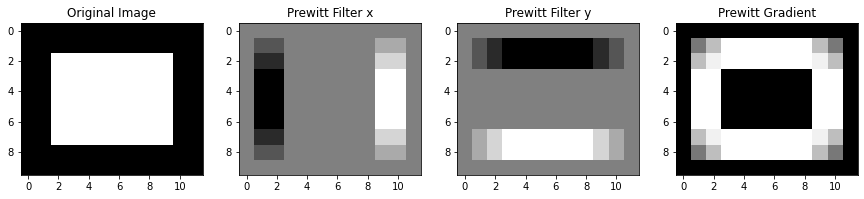

In [20]:
# Import useful packages
import numpy as np
import matplotlib.pyplot as plt 
import cv2

R = np.ones(shape=(6,8))
I = np.zeros(shape=(10,12))
I[2:8,2:10] = R


kernelx = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
kernely = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])

I_x = cv2.filter2D(I,-1,kernelx,borderType=cv2.BORDER_CONSTANT)
I_y = cv2.filter2D(I,-1,kernely,borderType=cv2.BORDER_CONSTANT)
G_I = np.sqrt( I_x**2 + I_y**2)

fig, axs = plt.subplots(1,4,figsize=(15,10))
axs[0].imshow(I,   cmap='gray', vmin=I.min(),   vmax=I.max())
axs[0].set_title('Original Image')
axs[1].imshow(I_x ,cmap='gray', vmin=I_x.min(), vmax=I_x.max())
axs[1].set_title('Prewitt Filter x')
axs[2].imshow(I_y, cmap='gray', vmin=I_y.min(), vmax=I_y.max())
axs[2].set_title('Prewitt Filter y')
axs[3].imshow(G_I, cmap='gray', vmin=G_I.min(), vmax=G_I.max())
axs[3].set_title('Prewitt Gradient')


**b)** Sketch the histogram of gradient directions (**in degrees**).

<details style="margin-top:20px">
    <summary>
        <font size="2" color="green"><b>Click here for an optional hint</b></font>
    </summary>
    </font>
</summary>

The <code>numpy.arctan2</code> function (<a href="https://numpy.org/doc/stable/reference/generated/numpy.arctan2.html">Documentation</a>) might be useful for this task to convert the x-y coordinates into radiants. 

</details>

Text(0.5, 1.0, 'Prewitt Gradient Directions Histogram')

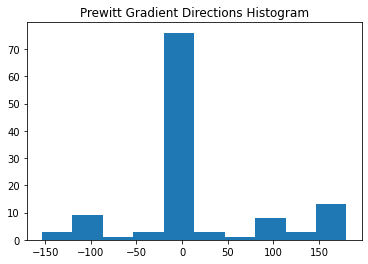

In [19]:
G_directions_I = np.arctan2(I_x,I_y)
G_directions_I = np.degrees(G_directions_I)
plt.hist(G_directions_I.ravel())
plt.title("Prewitt Gradient Directions Histogram")

The Laplacian can be computed using the following mask:
\begin{equation}\label{L4-eq2}
    {\mathbf h}_{L}=
    \begin{bmatrix} 0 & -1 & 0\\ -1 & 4 & -1\\ 0 & -1 & 0\end{bmatrix},
\end{equation}


**c)** Sketch the Laplacian of the test image using the mask in previous equation. Show all relevant pixel values in the Laplacian image.


Text(0.5, 1.0, 'Laplacian Gradient')

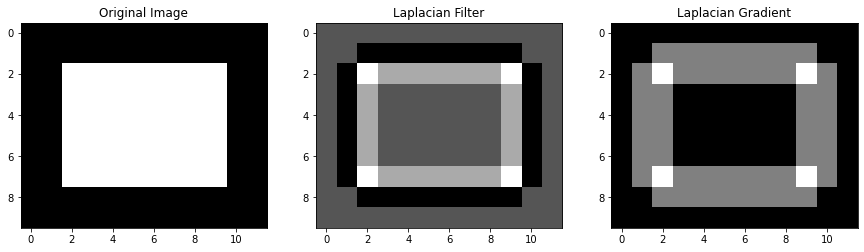

In [24]:
kernel_l = np.array([[0, -1, 0], 
                     [-1, 4, -1],
                     [0, -1, 0]])

I_l = cv2.filter2D(I,-1,kernel_l,borderType=cv2.BORDER_CONSTANT)
G_I_l = np.sqrt( I_l**2)

fig, axs = plt.subplots(1,3,figsize=(15,10))
axs[0].imshow(I,   cmap='gray', vmin=I.min(),   vmax=I.max())
axs[0].set_title('Original Image')
axs[1].imshow(I_l ,cmap='gray', vmin=I_l.min(), vmax=I_l.max())
axs[1].set_title('Laplacian Filter')
axs[2].imshow(G_I_l, cmap='gray', vmin=G_I_l.min(), vmax=G_I_l.max())
axs[2].set_title('Laplacian Gradient')

**d)** What is the resulting mask for computation of the Laplacian if the Prewitt masks are used for computation of the differentials? 

<details style="margin-top:20px">
    <summary>
        <font size="2" color="green"><b>Click here for optional hints</b></font>
    </summary>
    </font>
</summary>

- Import the <code>scipy</code>  package and use the <code>convolve2d</code> function (<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html">Documentation</a>) for this task.

- If you want to check if the resulting mask is correct, use the built-in cv2 <code>cv2.Laplacian(I, -1, ksize=5)</code> function (<a href="https://docs.opencv.org/4.5.3/d4/d86/group__imgproc__filter.html#gad78703e4c8fe703d479c1860d76429e6">Documentation</a>) where <code>I</code> is the test image and <code>ksize</code> is the aperture size used to compute the second-derivative filters. The visualization of the two masks should be almost identical (although the pixel values are different).
</details>


Text(0.5, 1.0, 'cv2 Laplacian')

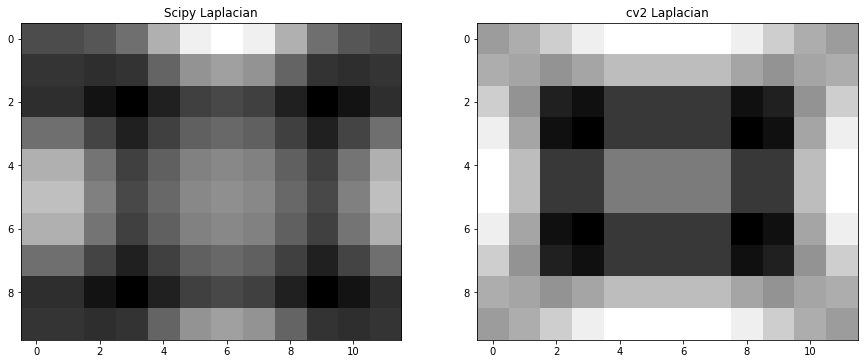

In [62]:
import scipy
from scipy import signal
I_l_1 = signal.convolve2d(I,G_I,mode='same',boundary='symm')
I_l_2  = cv2.Laplacian(I, -1, ksize=5)


fig, axs = plt.subplots(1,2,figsize=(15,10))
axs[0].imshow(I_l_1,   cmap='gray', vmin=I_l_1.min(),   vmax=I_l_1.max())
axs[0].set_title('Scipy Laplacian')
axs[1].imshow(I_l_2 ,cmap='gray', vmin=I_l_2.min(), vmax=I_l_2.max())
axs[1].set_title('cv2 Laplacian')



## Problem 3

One of the most common linear filters in computer vision applications is the Gaussian smoothing filter. 

In this problem we want to study the use of Gaussian filters with different standard deviations, $\sigma$, and different sizes, $K \times K$, where $K$ is odd ($K = 2k+1$, $k$ is integer). 
The filter kernel (mask) is found by using the OpenCV function `cv2.getGaussianKernel()` ([Documentation](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#Mat%20getGaussianKernel(int%20ksize,%20double%20sigma,%20int%20ktype))). 
Start by finding filter masks as follows

**a)** **h1**: $\sigma = 1$, $K = 9$

**b)** **h15**: $\sigma = 1.5$, $K = 11$

**c)** **h2**: $\sigma = 2$, $K = 15$

Use the `plt.stem()` function from Matplotlib and display each filter (sampled 1D Gaussian function). 

If the size $K$ is too small we will get a truncated Gaussian with a step at the tails. 

**d)** Show the result for c) above when $K = 9$.

If we want a proper Gaussian filter there is a connection between the value of $\sigma$ and the size $K$. 
At three standard deviations, $3\sigma$, the value of the Gaussian is 1\% of its maximum value.


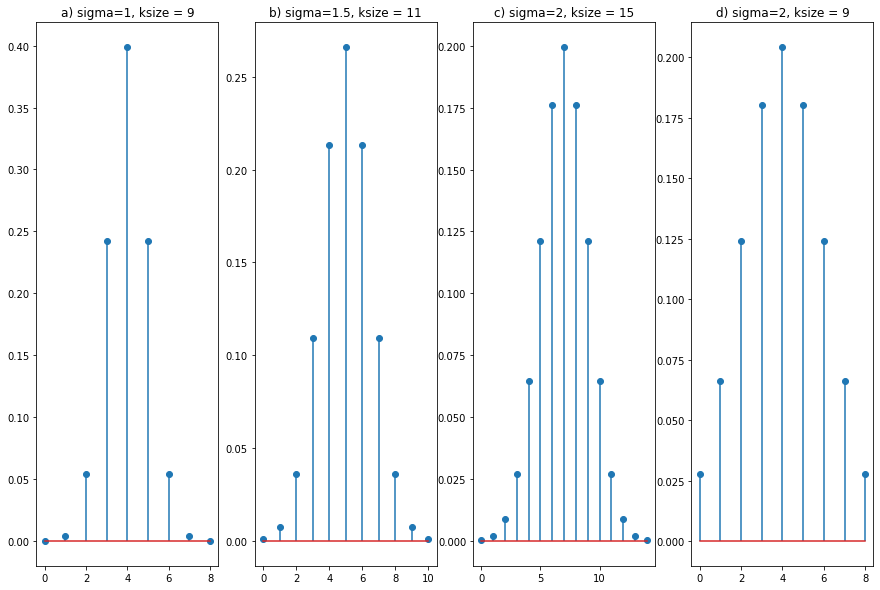

In [86]:
gauss_vars = [[1, 9, None],
              [1.5, 11, None],
              [2, 15, None],
              [2, 9, None],
             ]
fig, axs = plt.subplots(1,len(gauss_vars),figsize=(15,10))
for i in range(len(gauss_vars)):
    g =  gauss_vars[i]
    g[2] = cv2.getGaussianKernel(sigma=g[0],ksize = g[1])
    axs[i].stem(g[2])
    axs[i].set_title(f"{chr(97+i)}) sigma={g[0]}, ksize = {g[1]}")


## Problem 4

In this exercise we want to study how two well-known filters perform on noise removal, namely the Gaussian and the median filter. 
```python
import cv2
from skimage.util import random_noise

Im = cv2.imread('./images/cameraman.jpg')
Im_gauss = random_noise(Im,  mode='gaussian', mean=0.05, var=0.01) # Gaussian white noise with variance of 0.01 
Im_SP = random_noise(Im, 's&p', amount=0.05) # Salt and pepper noise on 5% of the pixels
```

<details style="margin-top:20px">
    <summary>
        <font size="2" color="green"><b>Click here for an optional hint</b></font>
    </summary>
    </font>
</summary>

You can filter an image with the OpenCV built-in functions in three different ways: 

- Use <code>cv2.sepFilter2D()</code> using the <code>kernelX</code> and <code>kernelY</code> parameters.

- Use the <code>cv2.filter2D()</code> using a 2D filter. 

- Perform 2 steps of <code>cv2.filter2D()</code> with the same(*) 1D filter.

(*) The second time, the 1D filter should be transposed.
</details>



**a)** Apply Gaussian smoothing to the original image, `Im`,  using the defined filter kernels from problem 3. Explain the results.

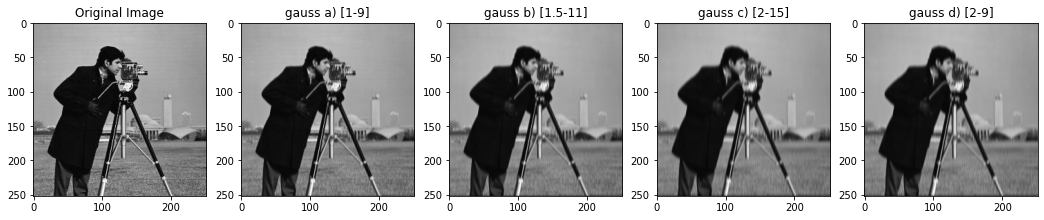

In [103]:
import cv2
from skimage.util import random_noise

Im = cv2.imread('./images/cameraman.jpg')
Im_gauss = random_noise(Im,  mode='gaussian', mean=0.05, var=0.01) # Gaussian white noise with variance of 0.01 
Im_SP = random_noise(Im, 's&p', amount=0.05) # Salt and pepper noise on 5% of the pixels

fig, axs = plt.subplots(1,len(gauss_vars) +1,figsize=(18,13))
axs[0].imshow(Im)
axs[0].set_title('Original Image')
for i in range(len(gauss_vars)):
    g = gauss_vars[i]
    g_ = cv2.filter2D(Im,-1, g[2],borderType=cv2.BORDER_CONSTANT)
    axs[i+1].imshow(g_)
    axs[i + 1 ].set_title(f'gauss {chr(97+i)}) [{g[0]}-{g[1]}]')

### Result Explanation

As the gaussian standard deviation increases the resultin the image can be seen by increasing the difumination of the pixels while smoothing the gray differences on it.

Gaussian noise:

**b)** Apply the three Gaussian filters, described in problem 3, to the image `Im_gauss`. Explain the results.

**c)** Apply a median filter on the image `Im_gauss` using the command `scipy.ndimage.median_filter` ([Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.median_filter.html#scipy.ndimage.median_filter)). How does this filter perform compared to the Gaussian filters?


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Median Filter Size 3')

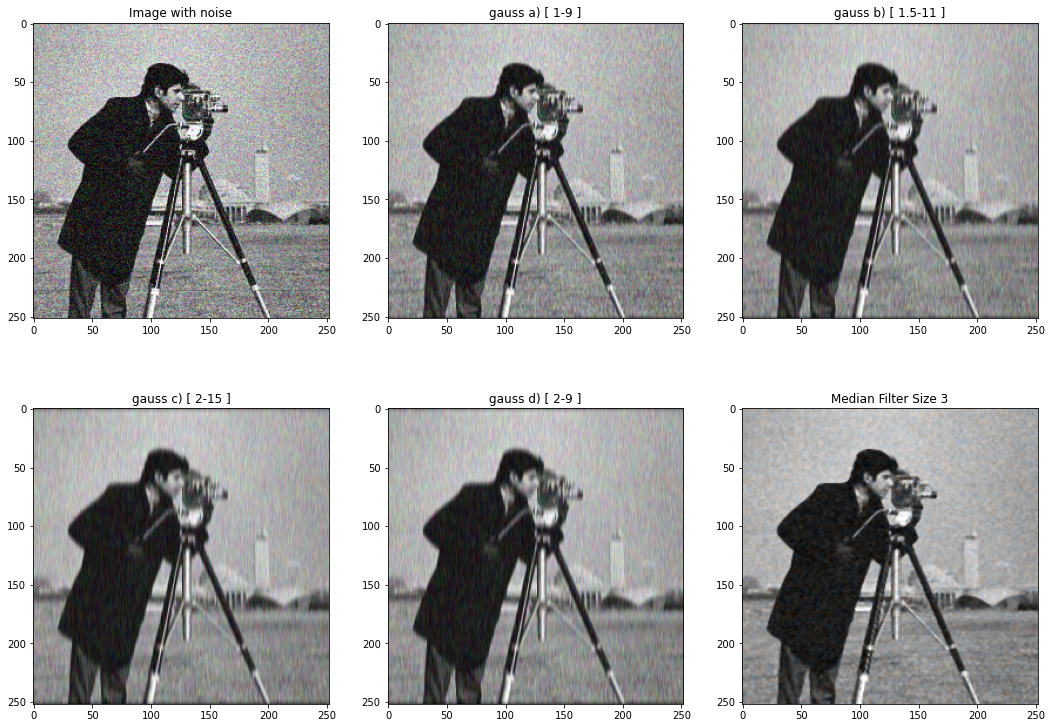

In [139]:
from scipy.ndimage import median_filter

g = gauss_vars
fig, axs = plt.subplots(2,3,figsize=(18,13))
axs[0][0].imshow(Im_gauss)
axs[0][0].set_title('Image with noise')
axs[0][1].imshow(cv2.filter2D(Im_gauss,-1, g[0][2],borderType=cv2.BORDER_CONSTANT))
axs[0][1].set_title(f'gauss a) [ {g[0][0]}-{g[0][1]} ]')
axs[0][2].imshow(cv2.filter2D(Im_gauss,-1, g[1][2],borderType=cv2.BORDER_CONSTANT))
axs[0][2].set_title(f'gauss b) [ {g[1][0]}-{g[1][1]} ]')

axs[1][0].imshow(cv2.filter2D(Im_gauss,-1, g[2][2],borderType=cv2.BORDER_CONSTANT))
axs[1][0].set_title(f'gauss c) [ {g[2][0]}-{g[2][1]} ]')
axs[1][1].imshow(cv2.filter2D(Im_gauss,-1, g[3][2],borderType=cv2.BORDER_CONSTANT))
axs[1][1].set_title(f'gauss d) [ {g[3][0]}-{g[3][1]} ]')

axs[1][2].imshow(median_filter(Im_gauss, size=3))
axs[1][2].set_title(f'Median Filter Size 3')
    
    
    

### Result Explanation

The median filter seems to do a better jobelliminating nosie as the parameter 'size' increases while preserving a nitid image, which means that has mor optimal algorithms to remove the  noise. It is however computationally speaking more expensive.


Salt & pepper noise:

**d)** Apply the three Gaussian filters, described in problem 3, to the image `Im_SP`. Explain the results.

**e)** Apply a median filter on the image `Im_SP` using the command `scipy.ndimage.median_filter` ([Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.median_filter.html#scipy.ndimage.median_filter)). How does this filter perform compared to the Gaussian filters?

Text(0.5, 1.0, 'Median Filter Size 3')

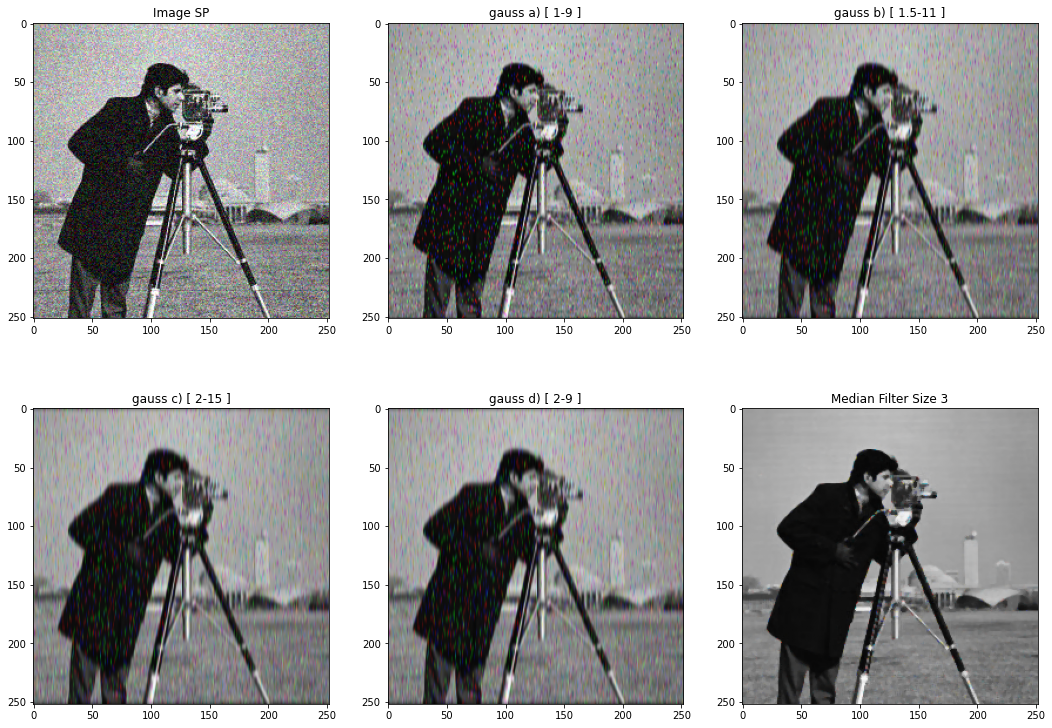

In [143]:
from scipy.ndimage import median_filter

g = gauss_vars
fig, axs = plt.subplots(2,3,figsize=(18,13))
axs[0][0].imshow(Im_gauss)
axs[0][0].set_title('Image SP')
axs[0][1].imshow(cv2.filter2D(Im_SP,-1, g[0][2],borderType=cv2.BORDER_CONSTANT))
axs[0][1].set_title(f'gauss a) [ {g[0][0]}-{g[0][1]} ]')
axs[0][2].imshow(cv2.filter2D(Im_SP,-1, g[1][2],borderType=cv2.BORDER_CONSTANT))
axs[0][2].set_title(f'gauss b) [ {g[1][0]}-{g[1][1]} ]')

axs[1][0].imshow(cv2.filter2D(Im_SP,-1, g[2][2],borderType=cv2.BORDER_CONSTANT))
axs[1][0].set_title(f'gauss c) [ {g[2][0]}-{g[2][1]} ]')
axs[1][1].imshow(cv2.filter2D(Im_SP,-1, g[3][2],borderType=cv2.BORDER_CONSTANT))
axs[1][1].set_title(f'gauss d) [ {g[3][0]}-{g[3][1]} ]')

axs[1][2].imshow(median_filter(Im_SP, size=3))
axs[1][2].set_title(f'Median Filter Size 3')
    

### Result Explanation

The results are quite impressive. While gaussian filters keep worsening the image (it seems a better distributed noise blended in the image)  the median filter outperforms and actualle seems to bring back the entire image by accurately removing the noise. Gauss is not able to distinguish the noise from black and white pixels (seems like) while the second filter seems to remove it well compraing the surrounding pixels from the noisy ones.



### Delivery (dead line) on CANVAS: 03.10.2021 at 23.59


## Contact
### Course teacher
Professor Kjersti Engan, room E-431,
E-mail: kjersti.engan@uis.no

### Teaching assistant
Tomasetti Luca, room E-401
E-mail: luca.tomasetti@uis.no


## References

[1] S. Birchfeld, Image Processing and Analysis. Cengage Learning, 2016.

[2] I. Austvoll, "Machine/robot vision part I," University of Stavanger, 2018. Compendium, CANVAS.
